**Attach libraries and dataset**



In [1]:
#Attach libraries needed for EDA
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Mount drive for access to file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Read file and generate head info
df = pd.read_csv('/content/drive/MyDrive/ALY6040.80439 Group assignment/loan_data.csv.xls')
df.head()

FileNotFoundError: ignored

**Generate summary info and identify characteristics of each variable**

In [ ]:
#Describe dataframe info to identify missing values and wrong data categorization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
# Generate summary statistics for dataframe
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Data visualizations/Exploratory Data Analysis**

Text(0, 0.5, 'Credit underiting criteria')

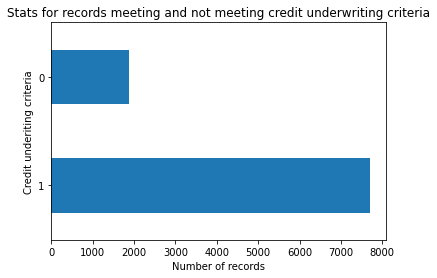

In [ ]:
#Creating bar plot to determine population of people who meet or do not meet credit underwriting criteria
df['credit.policy'].value_counts().plot(kind='barh')
plt.title('Stats for records meeting and not meeting credit underwriting criteria')
plt.xlabel('Number of records')
plt.ylabel('Credit underiting criteria')

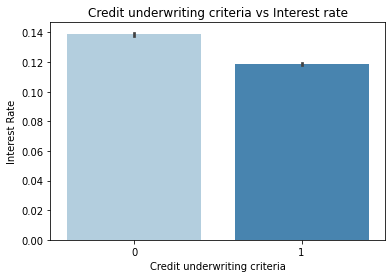

In [ ]:
#Creating bar plot to compare average interest rate with credit underwriting criteria
g1 = sns.barplot(x = 'credit.policy',y = 'int.rate',data = df,palette = "Blues")
#Adding the aesthetics
plt.title('Credit underwriting criteria vs Interest rate')
plt.xlabel('Credit underwriting criteria')
plt.ylabel('Interest Rate') 
# Show the plot
plt.show()

In [ ]:
#creating box plot to see distibution of FICO score for entire dataset
import plotly.express as px
fig = px.box(df, y='fico', title='Distribution of FICO scores')
fig

In [ ]:
#creating histogram to compare average interest rate and balance not fully paid
fig1 = px.histogram(df, x='not.fully.paid', y='int.rate', histfunc='avg', title='Not fully paid vs. Average interest rate')
fig1.update_xaxes(type='category')
fig1

In [ ]:
#Create histogram to compare purpose of loans and average interest rates
fig2 = px.histogram(df, x='purpose', y='int.rate', histfunc='avg', title='Purpose of loan vs. Average interest rate')
fig2.update_xaxes(categoryorder='total ascending')
fig2

In [ ]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

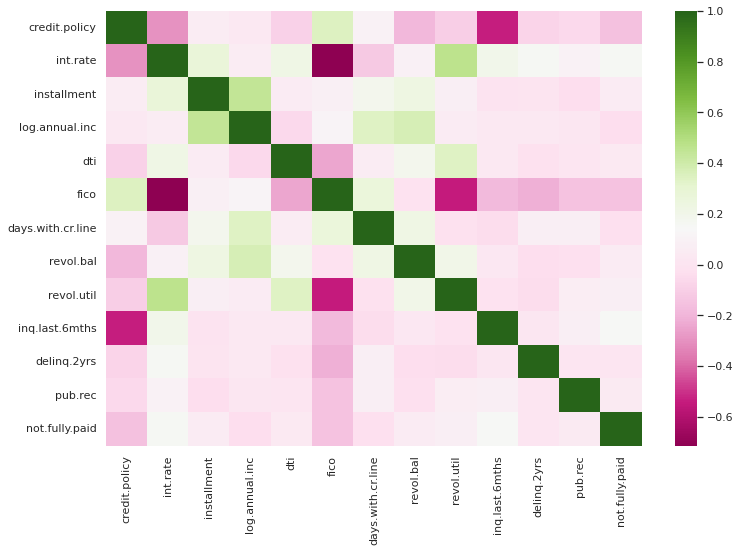

In [ ]:
# Correlation matrix for numerical variables
sns.heatmap(df.corr(),cmap="PiYG")